**решающее дерево**

Евгений Борисов <esborisov@sevsu.ru>

---

In [23]:
# from sklearn.datasets import load_iris
# data = load_iris()

from sklearn.datasets import load_wine
data = load_wine()


X = data['data']
target = data['target']
feature_names = data['feature_names'] 
target_names = data['target_names'] 

from sklearn.model_selection import train_test_split

X_train, X_test, target_train, target_test = train_test_split(X,target,test_size=.5)
display( X_train.shape, X_test.shape, )

assert len(target_train) == len(X_train)
assert len(target_test) == len(X_test)

del X,target,data

(89, 13)

(89, 13)

In [29]:
display(feature_names)

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, target_train)

In [25]:
from sklearn.metrics import classification_report

predicted = model.predict(X_test)

# метрики результата на тестовом наборе
print( classification_report(target_test,predicted) )

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        24
           1       0.97      0.83      0.89        41
           2       0.88      0.92      0.90        24

    accuracy                           0.90        89
   macro avg       0.89      0.92      0.90        89
weighted avg       0.91      0.90      0.90        89



In [26]:
# метрики результата на учебном наборе
print( classification_report(target_train, model.predict(X_train) ) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



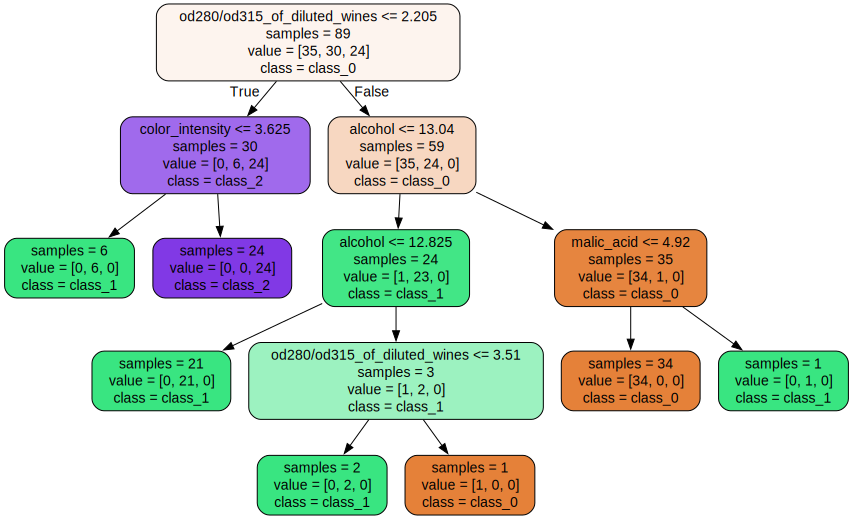

In [27]:
import graphviz
from sklearn.tree import export_graphviz

dot = graphviz.Source( 
    export_graphviz(
        model,
        feature_names=feature_names,
        class_names=target_names,
        filled=True, 
        rounded=True,
        impurity=False,
    ) 
)

display( dot )

In [28]:
import pandas as pd

display(
    pd.DataFrame({
        'feature':feature_names, 
        'importance':model.feature_importances_,
        }).sort_values(by='importance',ascending=False)
)

,feature,importance
11,od280/od315_of_diluted_wines,0.452496
0,alcohol,0.345390
9,color_intensity,0.155176
1,malic_acid,0.046938
2,ash,0.000000
3,alcalinity_of_ash,0.000000
4,magnesium,0.000000
5,total_phenols,0.000000
6,flavanoids,0.000000
7,nonflavanoid_phenols,0.000000
